In [23]:
from mylib.utils.misc import plot_voxel_enhance
from mylib.dataloader import dataset1
from mylib.dataloader import dataset 
#from mylib.dataloader.dataset import ClfSegDataset, get_balanced_loader, get_loader
import train
import numpy as np
%matplotlib inline

In [24]:
clf_seg_dataset = dataset1.ClfSegDataset(crop_size=32, subset=[1,2,3])

In [ ]:
train_num=len(clf_seg_dataset)
x_train= np.ones((train_num,32,32,32,1))
y_train= np.ones((train_num,1))
print(x_train.shape)
i=0
while i<train_num:
    x_train[i],(y_train[i],seg)=clf_seg_dataset[i]
    i+=1

from keras.utils import to_categorical
y_train=to_categorical(y_train,2)

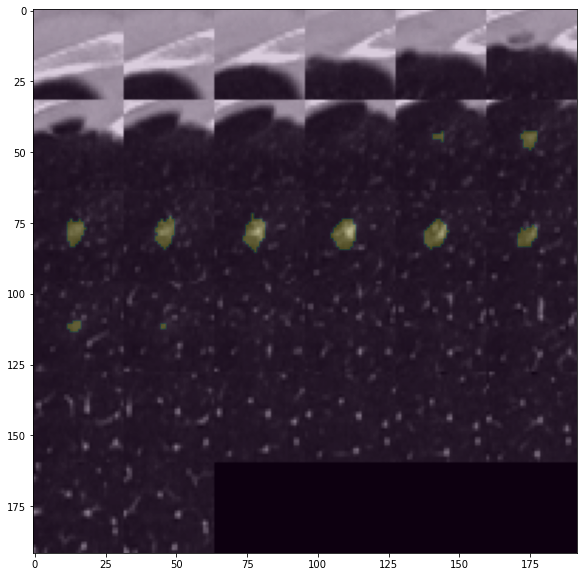

In [35]:
plot_voxel_enhance(x.squeeze(), seg.squeeze(), alpha=0.2)

# The interactive 3D nodule mesh plot

In [9]:
# from IPython.display import HTML
# from mylib.utils.plot3d import plotly_3d_scan_to_html

In [10]:
# plotly_3d_scan_to_html(seg.squeeze(),"tmp.html",step_size=3, zyx_range=((0,32),)*3)
# HTML("tmp.html")

# Create the models * 3D DenseSharp* and * 3D DenseNet*

In [26]:
import tensorflow as tf
import keras
#from keras.utils import to_categorical
print("TensorFlow version",tf.__version__)
print("Keras version",keras.__version__)


TensorFlow version 2.0.0
Keras version 2.3.1


In [27]:
from mylib.models.misc import set_gpu_usage
set_gpu_usage()

In [7]:
from mylib.models import densenet, densesharp

In [8]:
densenet_model = densenet.get_compiled()

Model hyper-parameters: {'activation': <function <lambda> at 0x000001D21CE1A558>, 'bn_scale': True, 'weight_decay': 0.0001, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x000001D2236C54C8>, 'dhw': [32, 32, 32], 'k': 16, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 2}
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 32, 32, 32, 1 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 3

In [28]:
densesharp_model = densesharp.get_compiled()

Model hyper-parameters: {'activation': <function <lambda> at 0x0000017E5BB4F288>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000017E031C1C18>, 'dhw': [32, 32, 32], 'k': 16, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3, 'dropout_rate': None}
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 32, 32, 32, 1 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv3d_28 (Conv3D)   

In [29]:
densesharp_model = densesharp.get_compiled(k=32)

Model hyper-parameters: {'activation': <function <lambda> at 0x0000017E5BB4F288>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000017E031C1C18>, 'dhw': [32, 32, 32], 'k': 32, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3, 'dropout_rate': None}
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 32, 32, 32, 1 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv3d_55 (Conv3D)   

In [45]:
#y_train_pred=densesharp_model.predict(x_train)
yy=np.array(y_train)
y_sque = np.squeeze(yy)
score=densesharp_model.evaluate(x_train,y_train)
print("Accuracy = ",score[1])

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., ...

In [24]:
un=np.array(y_train)

In [13]:
#un=un[[0,2]]
yy=y_train[[0,2,78]]
#print(y_sque.shape)
print('x_train:',x_train.shape)
yy

x_train: (297, 32, 32, 32, 1)


array([[0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [28]:
from keras.utils import to_categorical
val_dataset=dataset1.ClfSegDataset(crop_size=32, subset=[1])
val_num=len(val_dataset)
x_val= np.ones((val_num,32,32,32,1))
y_val= np.ones((val_num,1))
print(x_val.shape)
i=0
while i<val_num:
    x_val[i],(y_val[i],seg)=val_dataset[i]
    i+=1

y_val=to_categorical(y_val,2)

(115, 32, 32, 32, 1)


In [29]:
file_path='.\TrainedModel\seq_model\densenet-{epoch:02d}-{val_accuracy:.2f}.hdf5'

checkpoint = keras.callbacks.ModelCheckpoint(filepath=file_path,monitor='val_accuracy',mode='auto' ,save_best_only='True')
tensorboard =keras.callbacks.TensorBoard(log_dir='.\TrainedModel\seq_log')
callback_lists=[tensorboard,checkpoint]


In [13]:
densenet_model.fit(x_train,
              y_train,
              epochs=20,
              validation_data=(x_val, y_val),
              shuffle=False,
              batch_size=8,
              )

Train on 297 samples, validate on 168 samples
Epoch 1/20
297/297 [==============================] - 63s 212ms/step - loss: 0.9688 - categorical_crossentropy: 0.7489 - categorical_accuracy: 0.5253 - val_loss: 1.4505 - val_categorical_crossentropy: 1.2319 - val_categorical_accuracy: 0.5357
Epoch 2/20
297/297 [==============================] - 62s 209ms/step - loss: 0.9184 - categorical_crossentropy: 0.7019 - categorical_accuracy: 0.5522 - val_loss: 1.1663 - val_categorical_crossentropy: 0.9524 - val_categorical_accuracy: 0.5000
Epoch 3/20
297/297 [==============================] - 62s 209ms/step - loss: 0.8924 - categorical_crossentropy: 0.6813 - categorical_accuracy: 0.5859 - val_loss: 0.8857 - val_categorical_crossentropy: 0.6774 - val_categorical_accuracy: 0.5893
Epoch 4/20
297/297 [==============================] - 62s 209ms/step - loss: 0.8827 - categorical_crossentropy: 0.6769 - categorical_accuracy: 0.6162 - val_loss: 0.9519 - val_categorical_crossentropy: 0.7489 - val_categorical

In [18]:
history=densenet_model.fit(x_train,y_train,epochs=1,validation_split=0.3,shuffle=False,batch_size=4)
              #callbacks=callback_lists)

Train on 247 samples, validate on 107 samples
Epoch 1/1
247/247 [==============================] - 48s 194ms/step - loss: 0.8639 - categorical_crossentropy: 0.6545 - categorical_accuracy: 0.6073 - val_loss: 0.9674 - val_categorical_crossentropy: 0.7596 - val_categorical_accuracy: 0.6355


In [21]:
print(history.history.keys())
print(history.history)

dict_keys(['val_loss', 'val_categorical_crossentropy', 'val_categorical_accuracy', 'loss', 'categorical_crossentropy', 'categorical_accuracy'])
{'val_loss': [0.9674130608545286], 'val_categorical_crossentropy': [0.7595970630645752], 'val_categorical_accuracy': [0.6355140209197998], 'loss': [0.8639363149399699], 'categorical_crossentropy': [0.6545345], 'categorical_accuracy': [0.60728747]}


In [ ]:
y_pre=densenet_model.predict(x_train)

In [240]:
import h5py
print("Saving model to disk \n")
mp = './seq_model/acc-0.67-val-0.59-all-0.60.h5'
model.save(mp)

Saving model to disk 



In [31]:
densesharp_model.fit(x_train,
              y_train,
              epochs=10,
              validation_data=(x_val, y_val),
              shuffle=True,
              batch_size=5,
              callbacks=callback_lists
              )

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., ...

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization,MaxPooling2D
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as pl
from mylib.models.CNNModel import c3d_model

In [31]:
sample_shape=(32,32,32,1)
model=Sequential()
#x_train=np.zeros(297,32,32,32,1)
#y_train=np.zeros(297,2)
#seg_train=np.zeros(297,32,32,32,1)
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.6))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.7))


model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              #loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()
# Fit data to model


    
    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_28 (Conv3D)           (None, 30, 30, 30, 32)    896       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 15, 15, 15, 32)    0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 15, 15, 15, 32)    128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 15, 32)    0         
_________________________________________________________________
conv3d_29 (Conv3D)           (None, 13, 13, 13, 64)    55360     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 6, 6, 6, 64)       0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 6, 6, 6, 64)      

In [27]:
model2 = Sequential()

# 160*100*22
model2.add(Conv3D(32,kernel_size=(9,9,9),input_shape=(32,32,32,1),activation='relu'))# now 152*92*14

model2.add(MaxPooling3D(pool_size=(5,5,5)))# now 76*46*14

model.add(Conv3D(30, kernel_dim1=7, # depth
                        kernel_dim2=7, # rows
                        kernel_dim3=7, # cols
                        activation='relu'))# now 68*38*8

model.add(MaxPooling3D(
    pool_size=(2,2,2)
))# now 34*19*8

model.add(Conv3D(50,
                        kernel_dim1=2, # depth
                        kernel_dim2=2, # rows
                        kernel_dim3=2, # cols
                        activation='relu'
))# row 26*12*4

model.add(MaxPooling3D(
    pool_size=(2,2,2)
))# now 13*6*4

model.add(Conv3D(150,
                        kernel_dim1=3, # depth
                        kernel_dim2=3, # rows
                        kernel_dim3=3, # cols
                        activation='relu'
))# now 10*4*2

model.add(MaxPooling3D(
    pool_size=(2,2,2)
))# now 5*2*2

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(1500,activation='relu'))

model.add(Dense(750,activation='relu'))

num=2
model.add(Dense(num,activation='softmax')) #classification

# Compile
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


ValueError: Input 0 is incompatible with layer max_pooling3d_7: expected ndim=5, found ndim=2

In [34]:
Model2=c3d_model()
Model2.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'])

from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath = './res/%s/weights.{epoch:02d}.h5' % 'testCNN', verbose = 1,
                              period = 1, save_weights_only = False)
best_keeper = ModelCheckpoint(filepath = 'tmp/%s/best.h5' % 'testCNN', verbose=1, save_weights_only = False,
                              monitor = 'binary_accuracy', save_best_only = True, period = 1, mode = 'max')
early_stopping = EarlyStopping(monitor = 'binary_accuracy', min_delta = 0, mode = 'max', patience = 30, verbose = 1)

%callback_lists=[tensorboard,checkpoint]

In [ ]:
BATCH_SIZE = 64
NUM_CLASSES = 2
NUM_EPOCHS = 30
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

history = Model2.fit(x_train, y_train,
            batch_size=16,
            epochs=20,
            verbose=1,
            shuffle=True,
            validation_split=0.3)

Train on 325 samples, validate on 140 samples
Epoch 1/20
325/325 [==============================] - 12s 36ms/step - loss: 0.6966 - binary_accuracy: 0.5385 - val_loss: 0.6997 - val_binary_accuracy: 0.5143
Epoch 2/20
325/325 [==============================] - 10s 31ms/step - loss: 0.6963 - binary_accuracy: 0.5385 - val_loss: 0.6993 - val_binary_accuracy: 0.5143
Epoch 3/20
325/325 [==============================] - 10s 31ms/step - loss: 0.6960 - binary_accuracy: 0.5385 - val_loss: 0.6990 - val_binary_accuracy: 0.5143
Epoch 4/20
325/325 [==============================] - 10s 31ms/step - loss: 0.6959 - binary_accuracy: 0.5385 - val_loss: 0.6987 - val_binary_accuracy: 0.5143
Epoch 5/20
325/325 [==============================] - 10s 31ms/step - loss: 0.6955 - binary_accuracy: 0.5385 - val_loss: 0.6986 - val_binary_accuracy: 0.5143
Epoch 6/20
325/325 [==============================] - 10s 31ms/step - loss: 0.6953 - binary_accuracy: 0.5385 - val_loss: 0.6983 - val_binary_accuracy: 0.5143
Epoch 

In [32]:
file_path='.\seq_model\epo-{epoch:02d}-acc-{accuracy:.2f}-val-{val_accuracy:.2f}.hdf5'

checkpoint = keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_best_only=True,mode='auto')
tensorboard =keras.callbacks.TensorBoard(log_dir='.\seq_model\seq_log')
callback_lists=[tensorboard,checkpoint]

In [42]:
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
save_folder='seq_model'
checkpointer = ModelCheckpoint(filepath='.\tmp\%s\weights.{epoch:02d}.h5' % save_folder, verbose=1,
                                   period=1, save_weights_only=False)
best_keeper = ModelCheckpoint(filepath='.\tmp\%s\best.h5' % save_folder, verbose=1, save_weights_only=False,
                                  monitor='val_clf_acc', save_best_only=True, period=1, mode='max')
csv_logger = CSVLogger('.\tmp\%s\training.csv' % save_folder)
tensorboard = TensorBoard(log_dir='.\tmp\%s\logs' % save_folder)
early_stopping = EarlyStopping(monitor='val_clf_acc', min_delta=0, mode='max',
                                   patience=30, verbose=1)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.334, patience=10,
                                   verbose=1, mode='min', epsilon=1.e-5, cooldown=2, min_lr=0)
callback_lists2=[checkpointer, early_stopping, best_keeper, lr_reducer, csv_logger, tensorboard]

In [14]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [33]:
history = model.fit(x_train, y_train,
            batch_size=32,
            epochs=10,
            verbose=1,
            shuffle=True,
            validation_split=0.3,
            callbacks=callback_lists)

Train on 247 samples, validate on 107 samples
Epoch 1/10
 96/247 [==========>...................] - ETA: 3s - loss: 1.1886 - accuracy: 0.5938

F:\anaconda3\envs\kr\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.182906). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


247/247 [==============================] - 4s 15ms/step - loss: 1.1430 - accuracy: 0.5709 - val_loss: 1.4180 - val_accuracy: 0.5514

Epoch 00001: val_accuracy improved from -inf to 0.55140, saving model to .\seq_model\epo-01-acc-0.57-val-0.55.hdf5
Epoch 2/10
247/247 [==============================] - 1s 6ms/step - loss: 0.9352 - accuracy: 0.5749 - val_loss: 7.5395 - val_accuracy: 0.5140

Epoch 00002: val_accuracy did not improve from 0.55140
Epoch 3/10
247/247 [==============================] - 1s 6ms/step - loss: 0.9755 - accuracy: 0.5870 - val_loss: 1.8863 - val_accuracy: 0.4766

Epoch 00003: val_accuracy did not improve from 0.55140
Epoch 4/10
247/247 [==============================] - 1s 6ms/step - loss: 0.7838 - accuracy: 0.6235 - val_loss: 2.6260 - val_accuracy: 0.5234

Epoch 00004: val_accuracy did not improve from 0.55140
Epoch 5/10
247/247 [==============================] - 1s 6ms/step - loss: 0.7905 - accuracy: 0.6032 - val_loss: 1.9841 - val_accuracy: 0.5327

Epoch 00005: va

In [33]:
print(x_train.shape)
score_test=model.evaluate(x_train,y_train,verbose=0)
print('Testing loss: %.4f, Testing accuracy: %.2f%%' % (score_test[0],score_test[1]*100))

(354, 32, 32, 32, 1)
Testing loss: 0.6625, Testing accuracy: 62.43%


In [1]:
print(historu.history)

NameError: name 'historu' is not defined

In [257]:
from keras.utils import to_categorical
val_dataset=dataset1.ClfSegDataset(crop_size=32, subset=[1,2,3,0])
val_num=len(val_dataset)
x_val= np.ones((val_num,32,32,32,1))
y_val= np.ones((val_num,1))
print(x_val.shape)
i=0
while i<val_num:
    x_val[i],(y_val[i],seg)=val_dataset[i]
    i+=1

y_val=to_categorical(y_val,2)

(465, 32, 32, 32, 1)


In [256]:
from keras.utils import to_categorical
all_dataset=dataset1.ClfSegDataset(crop_size=32, subset=[0,1,2,3])
all_num=len(all_dataset)
x_all= np.ones((all_num,32,32,32,1))
y_all= np.ones((all_num,1))
print(x_all.shape)
i=0
while i<all_num:
    x_all[i],(y_all[i],seg)=all_dataset[i]
    i+=1

y_all=to_categorical(y_all,2)

(465, 32, 32, 32, 1)


In [162]:
import os
name = dataset.TEST_INFO.loc[:, 'name']
test_num=len(name)
xs = np.empty((test_num,*(32,32,32), 1))

for i in range(test_num):
        with np.load(os.path.join(dataset.TEST_PATH, '%s.npz' % name[i])) as npz:
            voxel=npz['voxel'][34:66,34:66,34:66]
            voxel=np.expand_dims(voxel,axis=-1)
            xs[i,]=voxel
x_test=xs
print(x_test.shape)

(117, 32, 32, 32, 1)


In [348]:
y_test_pre=model.predict(x_test)
print(y_test_pre.shape)

y_test1=y_test_pre[:,[1]]
y_test1[5]
y_test_pre[[5]]

(117, 2)


array([[0.05276583, 0.94723415]], dtype=float32)

In [350]:
#预测数据保存
from mylib.dataloader.path_manager import PATH
import pandas as pd

file_name="submission3.csv"
test_list = pd.read_table('D:/Anaconda/Jupyter/ML/BigHomework/DenseSharp-master/mylib/dataloader/data/dataset/sjtu-ee228-2020/test_result.csv',sep = ",")['name']
test_name = np.array(test_list).reshape(test_num)
print(y_test_pre.shape)
load_predicted = np.array(y_test1).reshape(test_num)
load_test_dict = {'name':test_name, 'Predicted':load_predicted}
load_result = pd.DataFrame(load_test_dict, index = [0 for _ in range(test_num)])
load_result.to_csv(file_name, index = False, sep = ',')


(117, 2)


In [64]:
import h5py
print("Saving model to disk \n")
mp = ".\TrainedModel\log\SequentialModel1.h5"
model.save(mp)

Saving model to disk 



In [373]:
from keras.models import load_model

#file_path1='./seq_model/epo-06-acc-0.64-val-0.61.hdf5'
#file_path1='./TrainedModel/log/SequentialModel1_6243.h5'
file_path1='D:\Anaconda\Jupyter\ML\BigHomework\DenseSharp-master\seq_model\epo-04-acc-0.64-val-0.65.hdf5'
model= load_model(file_path1)
#val_pre = model.predict(x_val, batch_size=5, verbose=1)
#score=model.evaluate
#test_pre=model.predict(x_test,batch_size=3,verbose=1)



In [366]:
from keras.utils import to_categorical
val_dataset=dataset1.ClfSegDataset(crop_size=32, subset=[1,2,3,0])
val_num=len(val_dataset)
x_val= np.ones((val_num,32,32,32,1))
y_val= np.ones((val_num,1))
print(x_val.shape)
i=0
while i<val_num:
    x_val[i],(y_val[i],seg)=val_dataset[i]
    i+=1

y_val=to_categorical(y_val,2)

(465, 32, 32, 32, 1)


In [367]:
score_test=model.evaluate(x_val,y_val,verbose=0)
print('Testing loss: %.4f, Testing accuracy: %.2f%%' % (score_test[0],score_test[1]*100))

Testing loss: 0.9997, Testing accuracy: 58.49%


In [1]:
58.28 56.76  59.13 61.90 61.97
60.65 51.35  60.00 60.12 57.75
56.56 54.05  54.78 54.93
58.71 54 63.48 65.48 57.75

10: 56.99     56.76     57.39     61.90     63.38
(2,0.71,0,58)   57  57.66  54.78  63.1  57.75
58.49 55 60 64 52.11

60.43
print(test_pre.shape)

y_test1=test_pre[:,[1]]
y_test1[5]
print('load后预测',y_test_pre[[6]])
y_test1=y_test_pre[:,[1]]
y_test1[5]
y_test_pre[[5]]
print('load前预测',y_test_pre[[6]])

NameError: name 'test_pre' is not defined

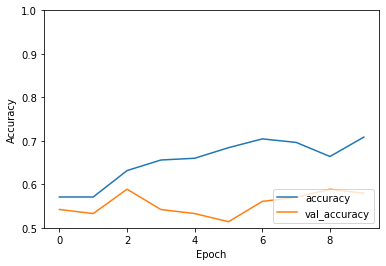

In [351]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')